In [1]:
%cd ..

/home/work/AnacondaProjects/categorical_bpl


In [2]:
import argparse
import collections
import pyro
import torch
import numpy as np
import data_loader.data_loaders as module_data
import model.model as module_arch
from parse_config import ConfigParser
from trainer import Trainer

In [3]:
%matplotlib inline

In [4]:
torch.autograd.set_detect_anomaly(True)

In [5]:
# fix random seeds for reproducibility
SEED = 123
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(SEED)

In [6]:
Args = collections.namedtuple('Args', 'config resume device')
config = ConfigParser.from_args(Args(config='config.json', resume=None, device=None))

In [7]:
logger = config.get_logger('train')

In [8]:
# setup data_loader instances
data_loader = config.init_obj('data_loader', module_data)
valid_data_loader = data_loader.split_validation()

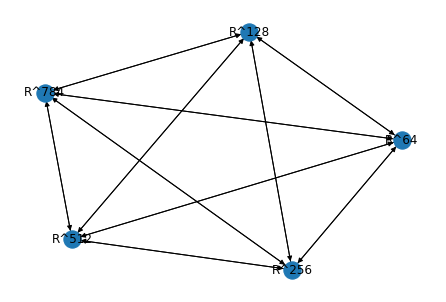

In [9]:
# build model architecture, then print to console
model = config.init_obj('arch', module_arch)
model.draw()

In [10]:
optimizer = config.init_obj('optimizer', pyro.optim)

In [11]:
trainer = Trainer(model, [], optimizer, config=config,
                  data_loader=data_loader,
                  valid_data_loader=valid_data_loader)

In [12]:
trainer.train()

Train Epoch: 1 [0/54000 (0%)] Loss: 96073.875000
Train Epoch: 1 [1408/54000 (3%)] Loss: 133079.406250
Train Epoch: 1 [2816/54000 (5%)] Loss: 74592.484375
Train Epoch: 1 [4224/54000 (8%)] Loss: 76422.859375
Train Epoch: 1 [5632/54000 (10%)] Loss: 68665.898438
Train Epoch: 1 [7040/54000 (13%)] Loss: 75674.812500
Train Epoch: 1 [8448/54000 (16%)] Loss: 62817.968750
Train Epoch: 1 [9856/54000 (18%)] Loss: 58944.484375
Train Epoch: 1 [11264/54000 (21%)] Loss: 53167.179688
Train Epoch: 1 [12672/54000 (23%)] Loss: 47144.054688
Train Epoch: 1 [14080/54000 (26%)] Loss: 23938.867188
Train Epoch: 1 [15488/54000 (29%)] Loss: 72034.476562
Train Epoch: 1 [16896/54000 (31%)] Loss: -15265.125000
Train Epoch: 1 [18304/54000 (34%)] Loss: -34186.789062
Train Epoch: 1 [19712/54000 (37%)] Loss: -45561.746094
Train Epoch: 1 [21120/54000 (39%)] Loss: 64758.855469
Train Epoch: 1 [22528/54000 (42%)] Loss: -86095.531250
Train Epoch: 1 [23936/54000 (44%)] Loss: -32653.281250
Train Epoch: 1 [25344/54000 (47%)] Lo